In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
dataset = pd.read_csv("D:\My_DS_Internship\Grocery_sales\Supermart Grocery Sales - Retail Analytics Dataset.csv",dtype = {'Sales' :'int16'})


Data Preprocessing

In [2]:
#make a copy of original dataset and keep it in data_cp so that we preserve the original dataset
data_cp = dataset.copy() 
#we convert the order date to date time format using pd.to_datetime
data_cp['Order Date'] = pd.to_datetime(data_cp['Order Date'],format = 'mixed')

#we remove the time stamp 00:00:00 from the date and again convert into datetime64 datatype
data_cp['Order Date'] = pd.to_datetime(data_cp['Order Date'].dt.date)

#print top 5 date
data_cp['Order Date'].head()

0   2017-11-08
1   2017-11-08
2   2017-06-12
3   2016-10-11
4   2016-10-11
Name: Order Date, dtype: datetime64[ns]

In [3]:
#check whether there are NaNs anwhere in the data
print(data_cp.isna().sum())
data_cp.drop_duplicates(inplace = True) #However, there are no duplicates

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [4]:
#Extracting date,month,and day from Order Date
data_cp['Order_Day'] = data_cp['Order Date'].dt.day
data_cp['Order_Month'] = data_cp['Order Date'].dt.month
data_cp['Order_Year'] = data_cp['Order Date'].dt.year


In [10]:
data_cp[data_cp['Region'] == 'North'].nunique()
#Since there'e only one sales in North region, we remove this data for clear observation in other regions

Order ID         1
Customer Name    1
Category         1
Sub Category     1
City             1
Order Date       1
Region           1
Sales            1
Discount         1
Profit           1
State            1
Order_Day        1
Order_Month      1
Order_Year       1
dtype: int64

In [11]:
northorder = data_cp[data_cp['Region']=='North'].index
data_cp.drop(northorder, inplace = True)

Exploratory Data Analysis

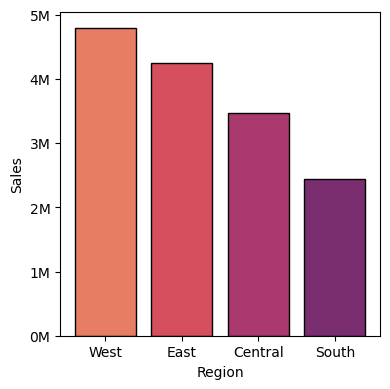

In [47]:
#Sales by Region
import matplotlib.ticker as ticker
import seaborn as sns
grouped = data_cp.groupby('Region')[['Sales']].sum().sort_values('Sales', ascending = False).reset_index()
plt.figure(figsize=(4,4))
palette = sns.color_palette("flare", len(grouped))  # or any other palette
plt.bar(grouped['Region'],grouped['Sales'], color = palette, edgecolor = 'black')
plt.xlabel('Region')
plt.ylabel('Sales')
# Set y-axis ticks to display in millions
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000000)}M'))

plt.tight_layout()
# plt.bar_label()
plt.show()


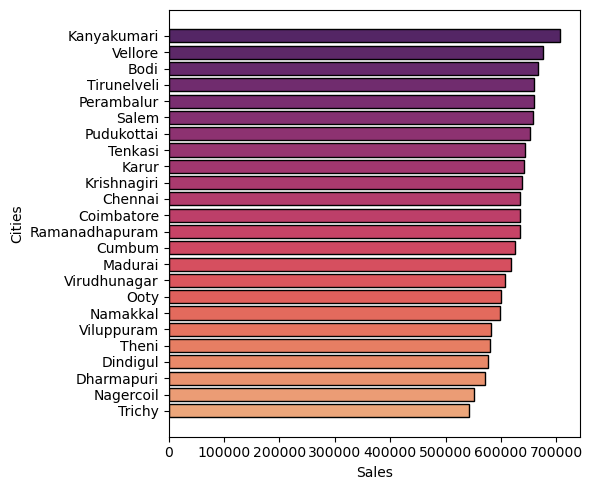

In [62]:
#Sales by City
grouped = data_cp.groupby('City')[['Sales']].sum().sort_values('Sales').reset_index()
plt.figure(figsize=(6,5))
palette = sns.color_palette("flare", len(grouped))  # or any other palette
plt.barh(grouped['City'],grouped['Sales'], color = palette, edgecolor = 'black')
plt.xlabel('Sales')
plt.ylabel('Cities')
plt.tight_layout()
plt.show()

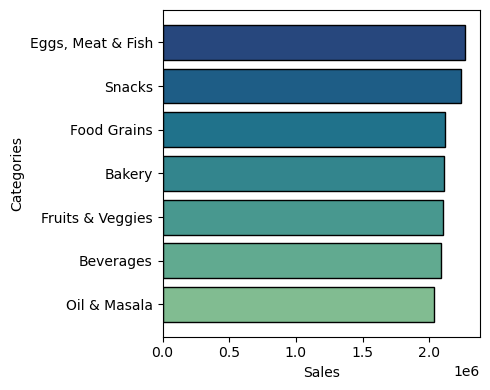

In [60]:
#Sales by categories
grouped = data_cp.groupby('Category')[['Sales']].sum().sort_values('Sales').reset_index()
plt.figure(figsize=(5,4))
palette = sns.color_palette("crest", len(grouped))  # or any other palette
plt.barh(grouped['Category'],grouped['Sales'], color = palette, edgecolor = 'black')
plt.xlabel('Sales')
plt.ylabel('Categories')
plt.tight_layout()
plt.show()




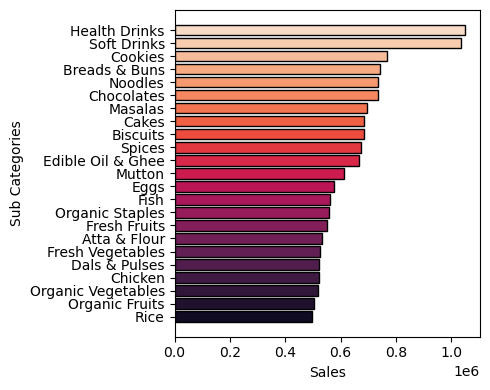

In [72]:
#Sales by sub categories
grouped = data_cp.groupby('Sub Category')[['Sales']].sum().sort_values('Sales').reset_index()
plt.figure(figsize=(5,4))
palette = sns.color_palette("rocket", len(grouped))  # or any other palette
plt.barh(grouped['Sub Category'],grouped['Sales'], color = palette, edgecolor = 'black')
plt.xlabel('Sales')
plt.ylabel('Sub Categories')
plt.tight_layout()
plt.show()


In [ ]:
SALES TRENDS

1. Sales Trends with Year In Each Region

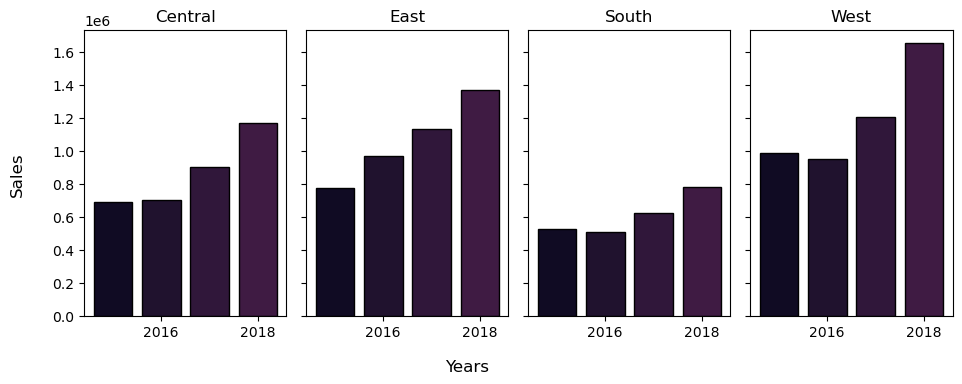

In [93]:
table = data_cp.groupby(['Region','Order_Year'])['Sales'].sum().reset_index()
Region = table['Region'].unique()
fig, axes = plt.subplots(nrows = 1, ncols = 4 ,sharey = True, figsize = (10,4))
axes = axes.flatten()
for ax , region in zip(axes,Region):
    table_data = table[table['Region']== region]
    ax.bar(table_data['Order_Year'],table_data['Sales'] , color = palette ,edgecolor = 'black')
    ax.set_title(region)
# Add common x-label at the middle bottom of the figure
fig.text(0.5, 0.02, 'Years', ha='center', va='center', fontsize=12)

# Add common y-label on the left side of the entire figure
fig.text(0.05, 0.5, 'Sales', ha='center', va='center', rotation='vertical', fontsize=12)
plt.tight_layout(rect=[0.07, 0.05, 1, 0.95])  # Adjust layout to make space for labels
plt.show()


2. Sales Trend by Weekdays 

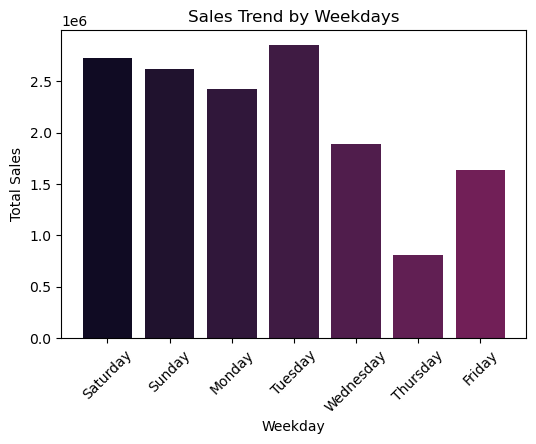

In [99]:
data_cp['weekday'] = data_cp['Order Date'].dt.day_name()
sales_by_weekday = data_cp.groupby('weekday')['Sales'].sum().reindex([ 'Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.figure(figsize=(6, 4))
plt.bar(sales_by_weekday.index, sales_by_weekday.values , color = palette)
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.title('Sales Trend by Weekdays')
plt.xticks(rotation = 45)
# plt.grid(True)
plt.show()

3. Sales Trend by Month

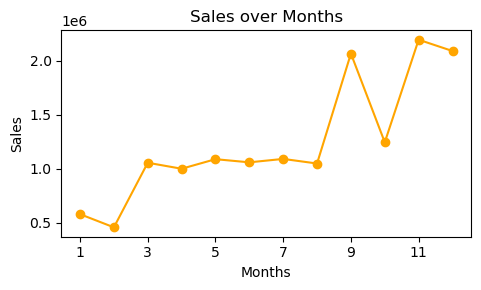

In [105]:
sales_df = data_cp.groupby(['Order_Month'])['Sales'].sum()
sales_df.index = sales_df.index.astype(str)
sales_df.plot(kind='line', figsize=(5, 3), marker='o', color = 'orange')
plt.title('Sales over Months')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

4. Sales Trends by Year

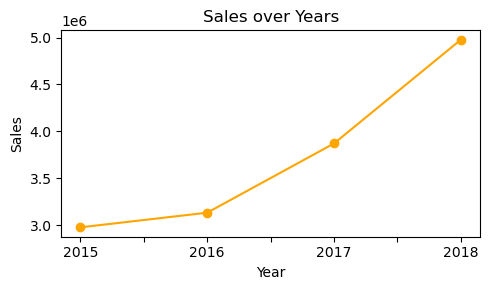

In [114]:
sales_df = data_cp.groupby(['Order_Year'])['Sales'].sum()
sales_df.index = sales_df.index.astype(str)
sales_df.plot(kind='line', figsize=(5, 3), marker='o', color = 'orange')
plt.title('Sales over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

Overall Sales Trend By Month and Year

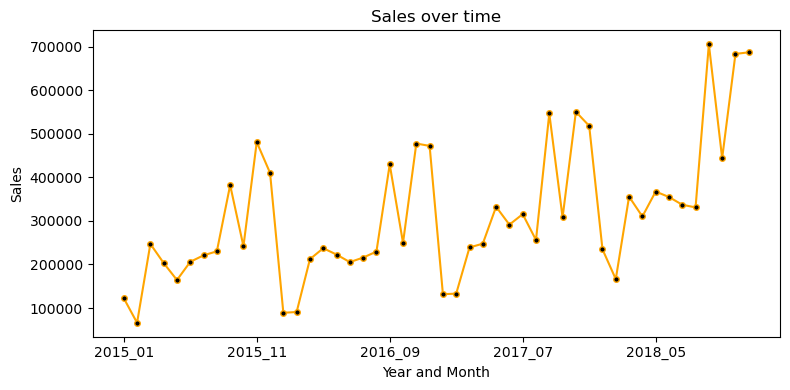

In [123]:
data_cp['Year_Month']= data_cp['Order_Year'].astype(str) + '_' + data_cp['Order_Month'].astype(str).str.zfill(2)
sales_df = data_cp.groupby(['Year_Month'])['Sales'].sum()
sales_df.index = sales_df.index.astype(str)
sales_df.plot(kind='line', figsize=(8, 4), marker='o', markersize = 4, color = 'orange', markerfacecolor = 'black')
plt.title('Sales over time')
plt.xlabel('Year and Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

FEATURE SELECTION AND MODEL BUILDING

In [79]:
#Feature Selection and Model Building
grouped_data = data_cp[['Region','City','Order_Month','Order_Year','Sales']]
features = grouped_data.drop(columns = ['Sales'])
cat_features = pd.get_dummies(features[['Region','City']], drop_first=True) #one Hot Encoding
features.drop(columns = ['Region','City'], inplace = True)
features = pd.concat([cat_features,features], axis  = 1)

target = grouped_data['Sales']


In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size = 0.2 , random_state = 42)

In [87]:
#Fitting a Linear Regression Model
from sklearn.linear_model import Ridge, Lasso
#Initialize the model
model = LinearRegression()
#Train the model
model.fit(X_train,Y_train)
Y_pred =model.predict(X_test)

In [88]:
#Evaluate the model
mse = mean_squared_error(Y_test,Y_pred, squared = False)
r2 = r2_score(Y_test,Y_pred)
print(f'Mean Squared Error = {mse}')
print(f'R - Squared = {r2}')

Mean Squared Error = 582.1870640582704
R - Squared = -0.006611490391445818


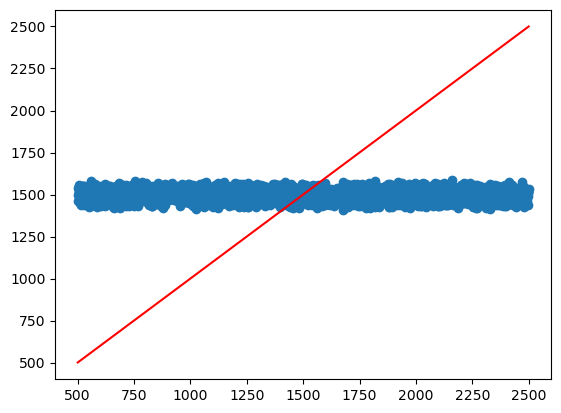

In [89]:
plt.scatter(Y_test,Y_pred)
plt.plot([min(Y_test),max(Y_test)], [min(Y_test),max(Y_test)], color='red')

In [92]:
#X_test has encoded data like True and False. So to fetch the actual data, we use the index 
#of the X_test and Y_test dataframe.
X_test = grouped_data.loc[X_test.index]


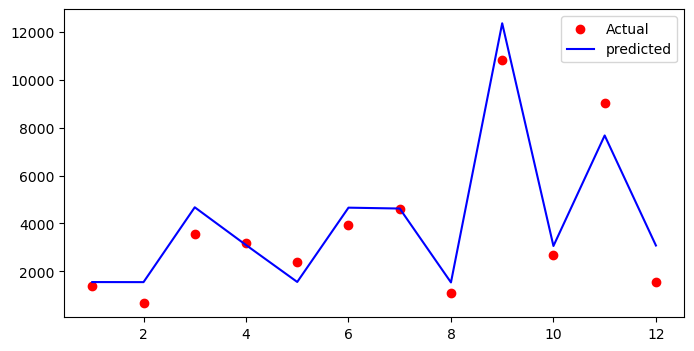

In [94]:
predicted = pd.DataFrame(X_test)
predicted[['Actual_Sales','predicted_sales']] = pd.DataFrame({'Actual_sales' : Y_test,
                                                             'predicted_sales' : Y_pred})
predicted = predicted.sort_values('Actual_Sales')
temp = predicted.groupby(['Region','City','Order_Month'])[['Actual_Sales','predicted_sales']].sum().reset_index().sort_values('Order_Month')

plot_data = temp[(temp['Region'] == 'West') & (temp['City'] == 'Perambalur')]
plt.figure(figsize = (8,4))
plt.scatter(plot_data['Order_Month'] , plot_data['Actual_Sales'], c = 'r')
plt.plot(plot_data['Order_Month'] , plot_data['predicted_sales'], c = 'b')
plt.legend(['Actual','predicted'])

Fitting a Random Forest Model

In [129]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [130]:
# Adding a feature YearMonth in the dataset
df = data_cp.drop(columns = ['Order ID','Customer Name','Order Date','Profit','State','weekday','Year_Month'])
Quarter = []
for item in df['Order_Month']:
    if item <= 3:
        Quarter.append(1)
    elif (item > 3) & (item <= 6):
        Quarter.append(2)
    elif (item > 6) & (item <= 9):
        Quarter.append(3)
    elif (item > 9) & (item <= 12):
        Quarter.append(4)
Quarter = pd.DataFrame(Quarter,columns = ['Quarter'])
Quarter.index = range(1, len(Quarter)+1)
df = pd.concat([df,Quarter], axis = 1)
df['Months_Since_Start'] = (df['Order_Year'] - 2015) * 12 + df['Order_Month']


In [131]:
#Training a Random Forest Model
# Defining features and target
X = df.drop(columns = ['Sales'])
y = df['Sales']
# df['Sales'] = np.log1p(df['Sales'])
categorical_features = ['Category','Sub Category','Region','City','Order_Month','Quarter']
numerical_features = ['Sales','Order_Year','Months_Since_Start']
#Preprocessing: One hot encode categorical features
preprocessor = ColumnTransformer(
    transformers = [
        ('Bone',OneHotEncoder(drop = 'first'),categorical_features)
    ],
    remainder = 'passthrough' #keeping the numerical features as they are
)
#Create a pipeline
model = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor(n_estimators = 100, random_state = 42))
])
#Train Test Split and Fit
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
model.fit(X_train,y_train)
#Predict and evaluate
y_pred = model.predict(X_test)
# Evaluate Performance
mse = mean_squared_error(y_test,y_pred, squared = False)
r2 = r2_score(y_test,y_pred)
print(f'Mean Squared Error : {mse:.2f}')
print(f'R-Squared : {r2:.2f}')


Mean Squared Error : 599.74
R-Squared : -0.07


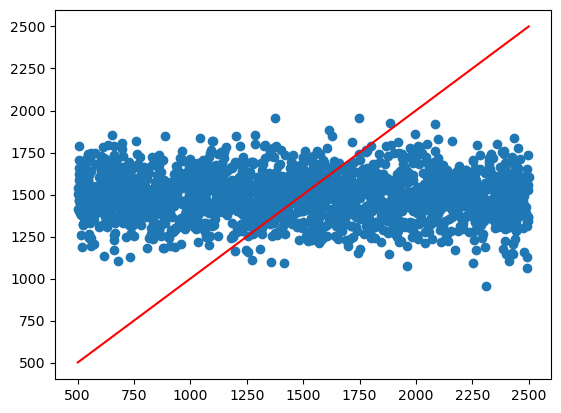

In [132]:
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red')

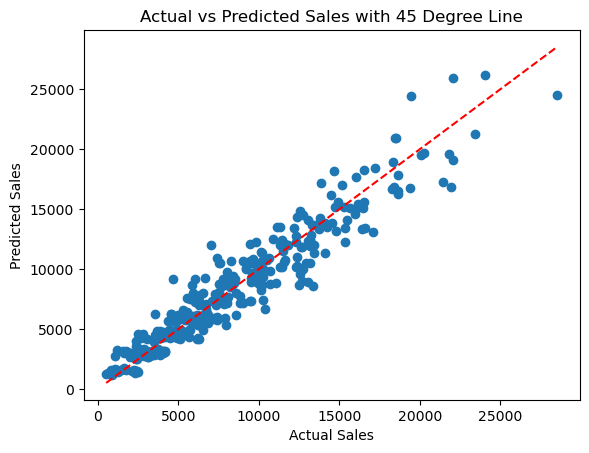

Actual_Sales  predicted_sales
Region  City    Quarter                               
Central Bodi    1                3245          2994.67
                2                5550          6462.22
                3               16496         15634.98
                4                3657          4464.61
        Chennai 1                4815          6080.94

In [100]:
predicted_rf = pd.DataFrame(X_test)
predicted_rf[['Actual_Sales','predicted_sales']] = pd.DataFrame({'Actual_sales' : (y_test),
                                                             'predicted_sales' : y_pred})
data = predicted_rf.groupby(['Region','City','Quarter'])[['Actual_Sales','predicted_sales']].sum()
plt.scatter(data['Actual_Sales'],data['predicted_sales'])
# Defining line coordinates from min to max of Actual_Sales
min_val = data['Actual_Sales'].min()
max_val = data['Actual_Sales'].max()

# Plotting y = x line (45 degrees)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales with 45 Degree Line')
plt.show()
data.head()


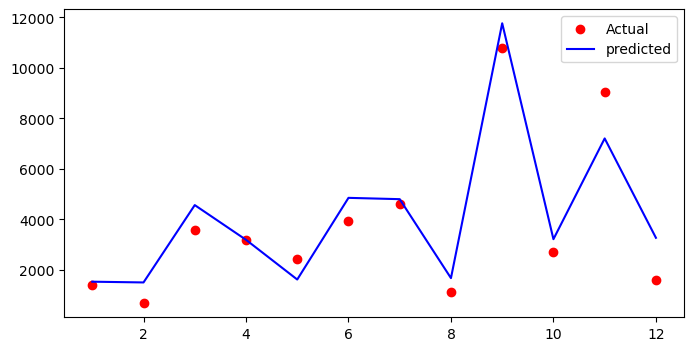

In [101]:
temp = predicted_rf.groupby(['Region','City','Order_Month'])[['Actual_Sales','predicted_sales']].sum().reset_index().sort_values('Order_Month')

plot_data = temp[(temp['Region'] == 'West') & (temp['City'] == 'Perambalur')]
plt.figure(figsize = (8,4))
plt.scatter(plot_data['Order_Month'] , plot_data['Actual_Sales'], c = 'r')
plt.plot(plot_data['Order_Month'] , plot_data['predicted_sales'], c = 'b')
plt.legend(['Actual','predicted'])


We see that for the available dataset, Linear Regression gives lower MSE than Random Forest.